# 2.5 Getting data from the Internet

*Estimated time to complete this notebook: 10 minutes*

We've seen about obtaining data from our local file system.

The other common place today that we might want to obtain data is from the internet.

It's very common today to treat the web as a source and store of information; we need to be able to programmatically
download data, and place it in Python objects.

We may also want to be able to programmatically *upload* data, for example, to automatically fill in forms.

This can be really powerful if we want to, for example, do automated metaanalysis across a selection of research papers.

## 2.5.1 URLs

All internet resources are defined by a Uniform Resource Locator.

`https://static-maps.yandex.ru:443/1.x/?z=12&size=400%2C400&ll=-0.1275%2C51.51&l=sat&lang=en_US`

A url consists of:

* A *scheme* (http, https, ssh, ...)
* A *host* (static-maps.yandex.ru, the name of the remote computer you want to talk to)
* A *port* (optional, most protocols have a typical port associated with them, e.g. 443 for https)
* A *path* (Like a file path on the machine, here it is 1.x)
* A *query* part after a ?, (optional, usually ampersand-separated *parameters* e.g. lang=en_US, or z=12)

**Supplementary materials**: These can actually be different for different protocols, the above is a simplification, you can see more, for example, at
    https://en.wikipedia.org/wiki/URI_scheme

URLs are not allowed to include all characters; we need to, for example, "escape" a space that appears inside the URL,
replacing it with `%20`, so e.g. a request of `http://some example.com/` would need to be `http://some%20example.com/`. In the URL above, the comma in the size parameter value `size=400,400` has to be replaced with `%2C` to give `size=400%2C400`.

**Supplementary materials**: The code used to replace each character is the [ASCII](http://www.asciitable.com) code for it.

**Supplementary materials**: The escaping rules are quite subtle. See https://en.wikipedia.org/wiki/Percent-encoding. The standard library provides the [urlencode](https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode) function that can take care of this for you. 

## 2.5.2 Requests

The python [requests](http://docs.python-requests.org/en/latest/) library can help us manage and manipulate URLs. It is easier to use than the 'urllib' library that is part of the standard library, and is included with anaconda and canopy. It sorts out escaping, parameter encoding, and so on for us.

To request the above URL, for example, we write:

In [1]:
import requests

In [2]:
response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
    params={
        "size": "400,400",  # size of map
        "ll": "-0.1275,51.51",  # longitude & latitude of centre
        "z": 12,  # zoom level
        "l": "sat",  # map layer (satellite image)
        "lang": "en_US",  # language
    },
)

When we do a request, the result comes back as text. For the png image in the above, this isn't very readable:

In [3]:
response.content[0:50]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f'

Just as for file access, therefore, we will need to send the text we get to a python module which understands that file format.

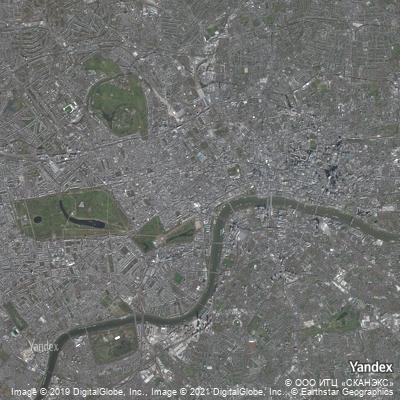

In [4]:
from IPython.display import Image

Image(response.content)

Again, it is important to separate the *transport* model (e.g. a file system, or an "http request" for the web) from the data model of the data that is returned.

## 2.5.3 Example: Sunspots

Let's try to get something scientific: the sunspot cycle data from http://sidc.be/silso/home:

In [5]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php").text

In [6]:
spots[0:80]

'1749;01;1749.042;  96.7; -1.0;   -1;1\n1749;02;1749.123; 104.3; -1.0;   -1;1\n1749'

This looks like semicolon-separated data, with different records on different lines. (Line separators come out as `\n`)

There are many many scientific datasets which can now be downloaded like this - integrating the download into your data pipeline can help to keep your data flows organised.

### Writing our own Parser

We'll need a python library to handle semicolon-separated data like the sunspot data.

You might be thinking: "But I can do that myself!":

In [7]:
lines = spots.split("\n")
lines[0:5]

['1749;01;1749.042;  96.7; -1.0;   -1;1',
 '1749;02;1749.123; 104.3; -1.0;   -1;1',
 '1749;03;1749.204; 116.7; -1.0;   -1;1',
 '1749;04;1749.288;  92.8; -1.0;   -1;1',
 '1749;05;1749.371; 141.7; -1.0;   -1;1']

In [8]:
years = [line.split(";")[0] for line in lines]

In [9]:
years[0:15]

['1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1749',
 '1750',
 '1750',
 '1750']

But **don't**: what if, for example, one of the records contains a separator inside it; most computers will put the content in quotes,
so that, for example,

    "Something; something"; something; something
    
has three fields, the first of which is

    Something; something
    
 The naive code above would give four fields, of which the first is 
 
    "Something

You'll never manage to get all that right; so you'll be better off using a library to do it.

## 2.5.4 Writing data to the internet

Note that we're using `requests.get`. `get` is used to receive data from the web.
You can also use `post` to fill in a web-form programmatically.

**Supplementary material**: Learn about using `post` with [requests](http://docs.python-requests.org/en/latest/user/quickstart/).

**Supplementary material**: Learn about the different kinds of [http request](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods): [Get, Post, Put, Delete](https://en.wikipedia.org/wiki/Create,_read,_update_and_delete)...

This can be used for all kinds of things, for example, to programmatically add data to a web resource. It's all well beyond
our scope for this course, but it's important to know it's possible, and start to think about the scientific possibilities.